In [6]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_path = '/Users/kelvin/Toxicity/data/train.csv'

In [5]:
df = pd.read_csv(train_path)

In [3]:
def preprocess(data):
    '''
    Credit goes to https://www.kaggle.com/gpreda/jigsaw-fast-compact-solution
    '''
    punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~`" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
    def clean_special_chars(text, punct):
        for p in punct:
            text = text.replace(p, ' ')
        return text
    data = data.astype(str).apply(lambda x: clean_special_chars(x, punct))
    return data

In [6]:
df.head(3)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.0,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.0,Thank you!! This would make my life a lot less...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.0,This is such an urgent design problem; kudos t...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4


In [7]:
cleaned_text = preprocess(df['comment_text'])
df['clean_text'] = cleaned_text

In [9]:
import pickle

In [10]:
with open('temporary.pickle', mode='wb') as f:
    pickle.dump(df, f)

In [88]:
with open('temporary.pickle', mode='rb') as f:
    data = pickle.load(f)

## Identities

In [93]:
data.rename({'homosexual_gay_or_lesbian':'gay_lesbian', 'intellectual_or_learning_disability':'learning_disability', 'psychiatric_or_mental_illness':'mental_illness', 'other_race_or_ethnicity':'other_race'}, axis=1, inplace=True)

In [96]:
with open('temporary.pickle', mode='wb') as f:
    pickle.dump(data, f)

In [42]:
with open('temporary.pickle', mode='rb') as f:
    data = pickle.load(f)

In [55]:
with open('preprocess_data.pickle', mode='rb') as f:
    data = pickle.load(f)

In [58]:
identities = ['male','female','transgender','other_gender','heterosexual','gay_lesbian',
              'bisexual','other_sexual_orientation','christian','jewish','muslim','hindu','buddhist',
              'atheist','other_religion','black','white','asian','latino', 'other_race',
              'physical_disability','learning_disability','mental_illness',
              'other_disability']

In [59]:
pd.set_option('display.max_columns', 500)

In [60]:
# getting the dataframe with identities tagged
labeled_df = data.loc[:, ['target'] + identities].dropna()
# lets define toxicity as a comment with a score being equal or .5
# in that case we divide it into two dataframe so we can count toxic vs non toxic comment per identity
toxic_df = labeled_df[labeled_df['target'] >= .5][identities]
non_toxic_df = labeled_df[labeled_df['target'] < .5][identities]

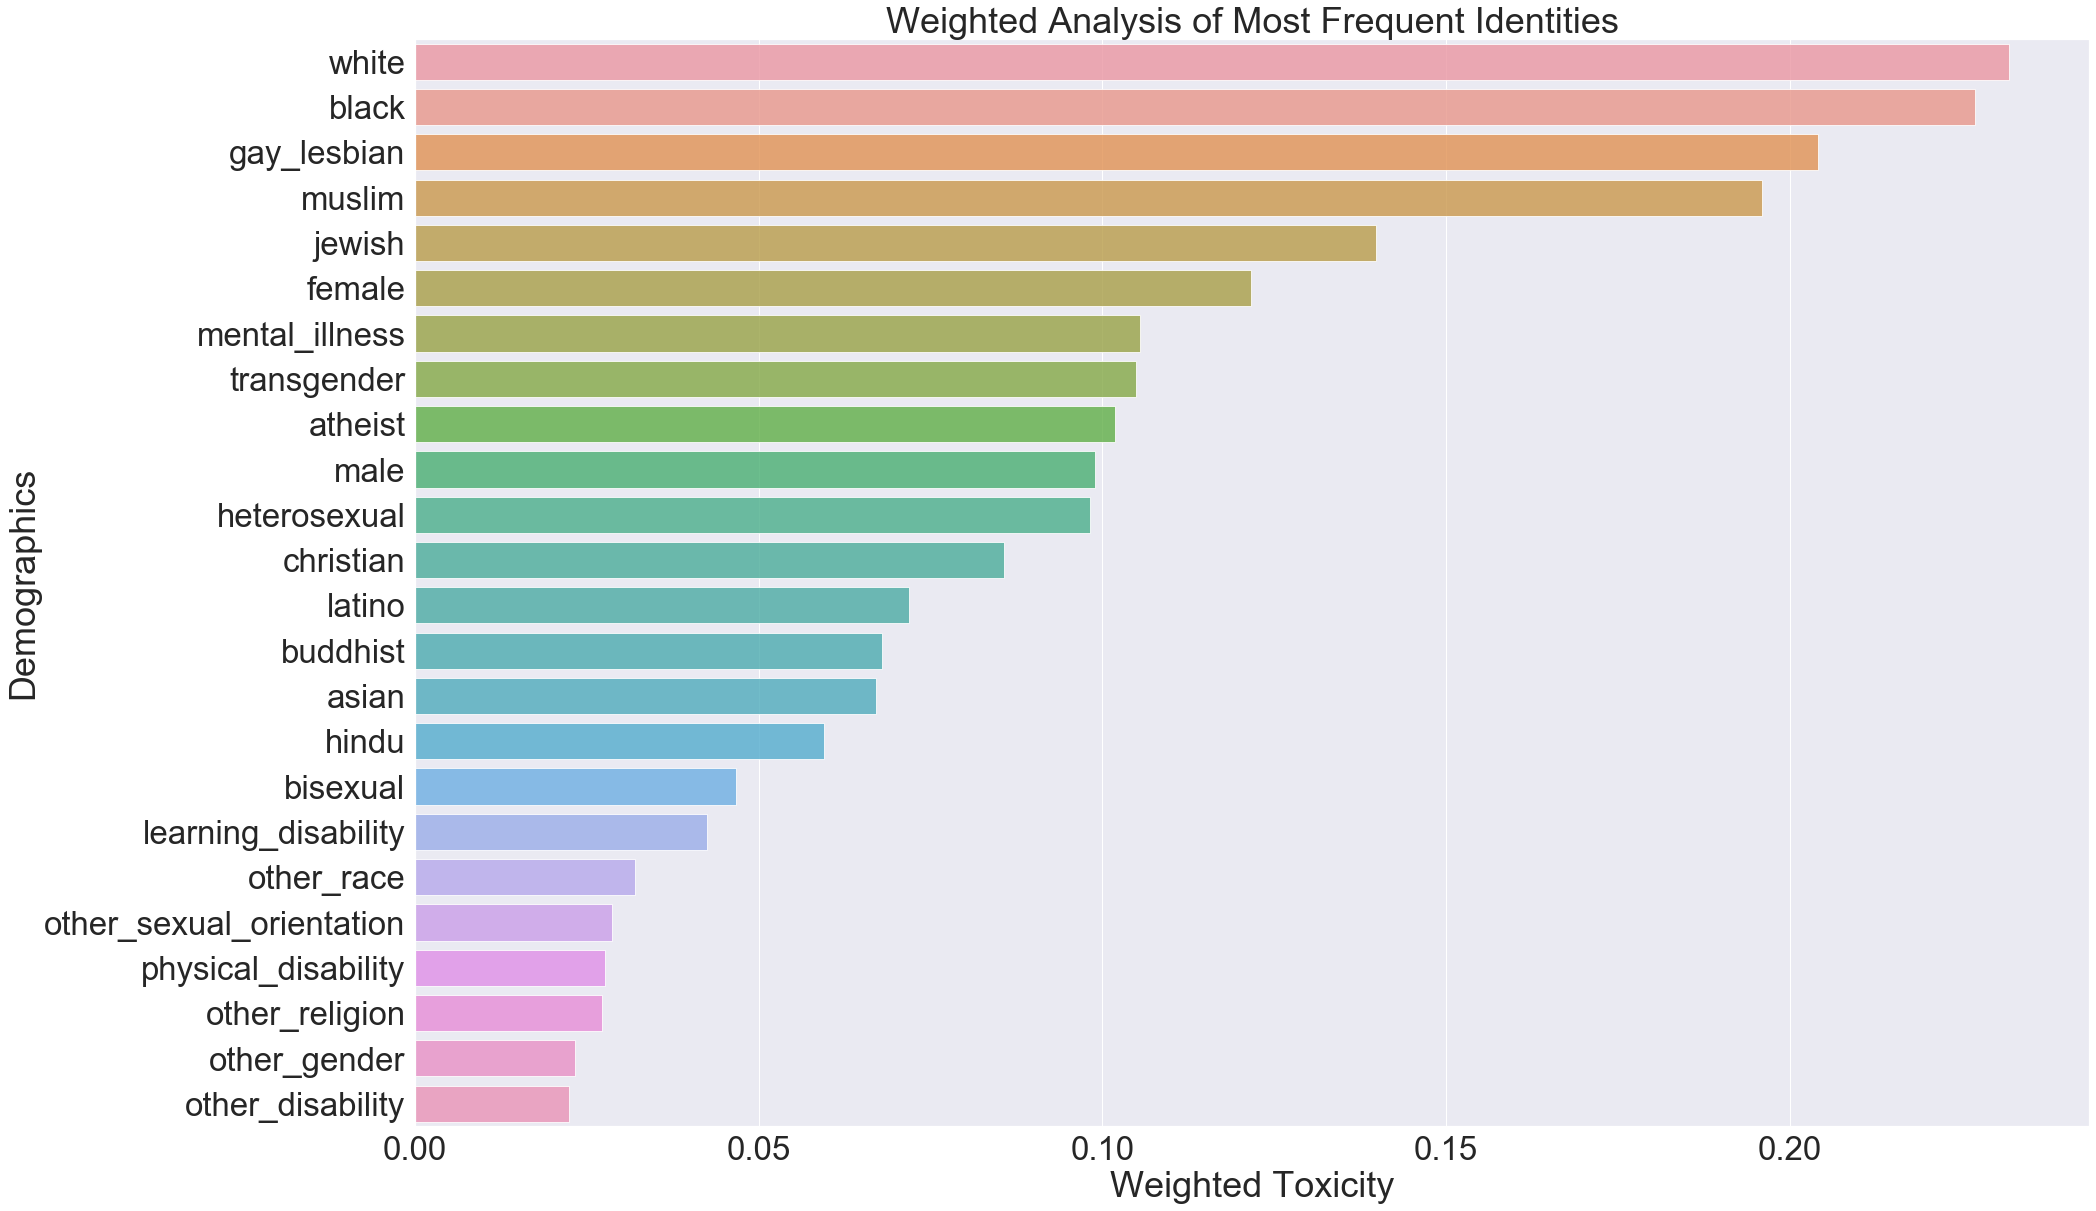

In [61]:
# First we multiply each identity with the target
weighted_toxic = labeled_df.iloc[:, 1:].multiply(labeled_df.iloc[:, 0], axis="index").sum() 
# changing the value of identity to 1 or 0 only and get comment count per identity group
identity_label_count = labeled_df[identities].where(labeled_df == 0, other = 1).sum()
# then we divide the target weighted value by the number of time each identity appears
weighted_toxic = weighted_toxic / identity_label_count
weighted_toxic = weighted_toxic.sort_values(ascending=False)
# plot the data using seaborn like before
plt.figure(figsize=(30,20))
sns.set(font_scale=3)
ax = sns.barplot(x = weighted_toxic.values , y = weighted_toxic.index, alpha=0.8)
plt.ylabel('Demographics')
plt.xlabel('Weighted Toxicity')
plt.title('Weighted Analysis of Most Frequent Identities')
plt.show()

In [102]:
weighted_toxicity = weighted_toxic.values
identity = weighted_toxic.index

## To Tableau

In [103]:
table = pd.concat([pd.Series(identity),pd.Series(weighted_toxicity)], axis=1)
table.columns = ['identity', 'weighted_toxicity']

In [104]:
table.to_csv('identity_toxicity_weighted.csv', index=True)

## Corr toxicity Identity

In [110]:
identities = ['male','female','transgender','heterosexual','gay_lesbian',
              'jewish','muslim', 'black','white']

(9.0, 0.0)

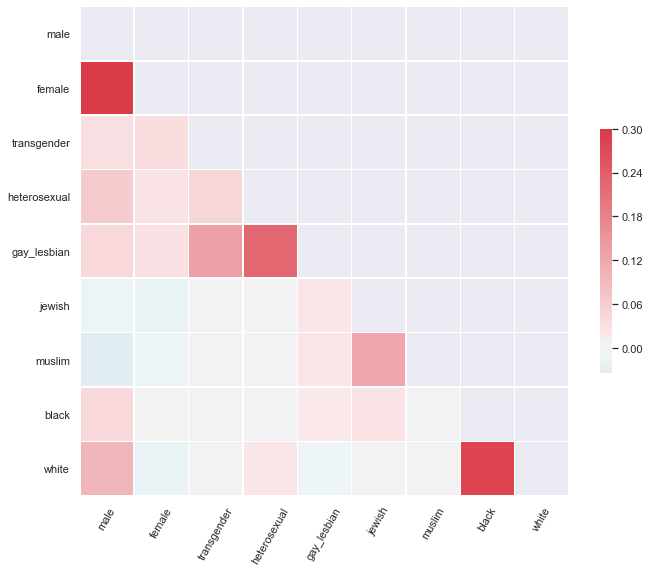

In [111]:
# Compute the correlation matrix
corr = data[identities].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
sns.set(font_scale = 1)
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, )
bottom, top = ax.get_ylim()
plt.xticks(rotation=60)
ax.set_ylim(bottom + 0.5, top - 0.5)

In [113]:
identities = ['male','female','heterosexual','gay_lesbian',
              'black','white']

(6.0, 0.0)

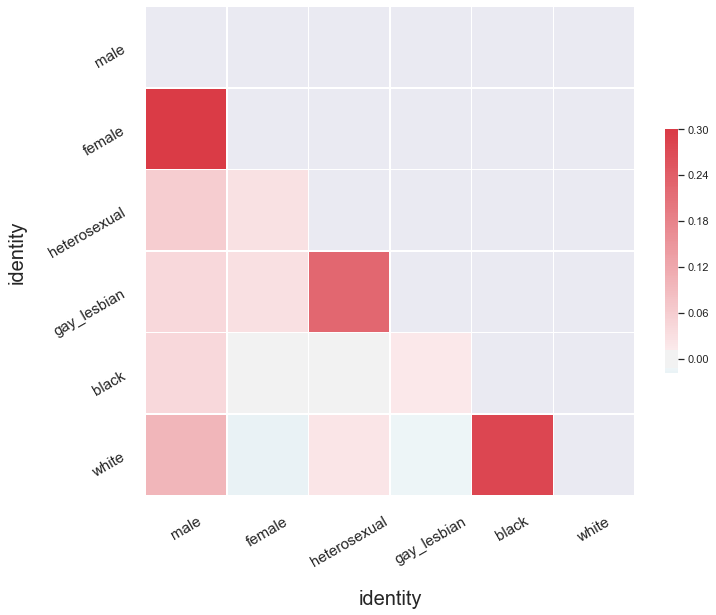

In [123]:
# Compute the correlation matrix
corr = data[identities].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
sns.set(font_scale = 1)
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
bottom, top = ax.get_ylim()
plt.xticks(rotation=30)
plt.xlabel('identity', fontsize=20, labelpad=20)
plt.ylabel('identity', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=12)
plt.yticks(rotation=30)
ax.set_ylim(bottom + 0.5, top - 0.5)

In [2]:
from contextlib import contextmanager
import time

#Decorator
@contextmanager
def timer(msg):
    t0 = time.time()
    print(f'[{msg}] start.')
    yield
    elapsed_time = time.time() - t0
    print(f'[{msg}] done in {elapsed_time / 60:.2f} min.')
    
#Call decorator
with timer('load data'):
    #Do anything after

In [4]:
import pickle

In [5]:
with timer('load data'):
    with open('temporary.pickle', mode='rb') as f:
        data = pickle.load(f)

[load data] start.
[load data] done in 0.17 min.
